In [1]:
%pylab inline
import pandas as pd
import seaborn as sn

Populating the interactive namespace from numpy and matplotlib


# buildsa

In [21]:
sa_time_df = pd.read_csv('sa_time.csv')
sa_time_df

,seq_len,sa_time,sa_size
0,100000,0.006608,400128
1,250000,0.016855,1000128
2,500000,0.031584,2000128
3,1000000,0.064449,4000128
4,2000000,0.129302,8000128


Text(0, 0.5, 'SA Construction Time (seconds)')

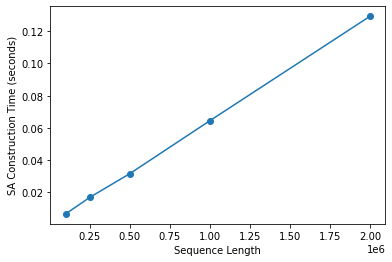

In [22]:
plt.plot(sa_time_df['seq_len'], sa_time_df['sa_time'], 'o-')
plt.xlabel('Sequence Length')
plt.ylabel('SA Construction Time (seconds)')
# plt.savefig('task_1/time_plot.png')

Text(0, 0.5, 'SA Construction Size (bytes)')

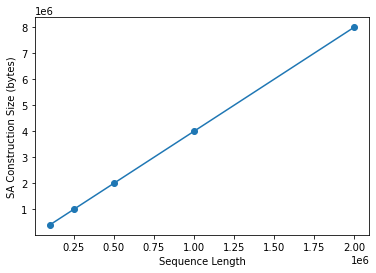

In [24]:
lengths = np.array(sa_time_df['seq_len'])
plt.plot(sa_time_df['seq_len'], sa_time_df['sa_size'], 'o-')
plt.xlabel('Sequence Length')
plt.ylabel('SA Construction Size (bytes)')

In [30]:
preftab_time_df = pd.read_csv('preftab_time.csv')
preftab_time_df.head()

,seq_len,k,preftab_time,preftab_size
0,100000,5,0.481868,37120
1,100000,10,0.784420,5061368
2,100000,20,0.792571,9588256
3,100000,30,0.772697,13585704
4,250000,5,1.232061,37120


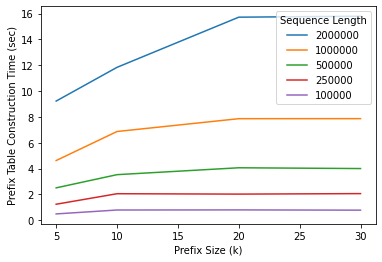

In [27]:
for seq_len in reversed(sorted(list(set(preftab_time_df['seq_len'])))):
    curr_df = preftab_time_df[preftab_time_df['seq_len'] == seq_len]
    plt.plot(curr_df['k'], curr_df['preftab_time'], label=seq_len)
plt.xlabel('Prefix Size (k)')
plt.ylabel('Prefix Table Construction Time (sec)')
plt.legend(title='Sequence Length')

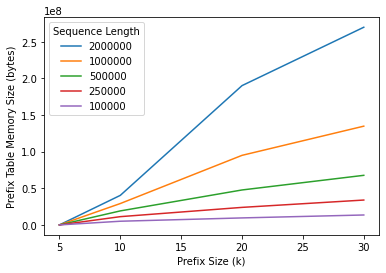

In [31]:
for seq_len in reversed(sorted(list(set(preftab_time_df['seq_len'])))):
    curr_df = preftab_time_df[preftab_time_df['seq_len'] == seq_len]
    plt.plot(curr_df['k'], curr_df['preftab_size'], label=seq_len)
plt.xlabel('Prefix Size (k)')
plt.ylabel('Prefix Table Memory Size (bytes)')
plt.legend(title='Sequence Length')

In [38]:
query_time_df = pd.read_csv('query_time.csv')
query_time_df.head()

,seq_len,k,method,query_time
0,100000,0,naive,1.049012
1,100000,0,simpaccel,2.925113
2,100000,5,naive,0.544618
3,100000,5,simpaccel,1.394052
4,100000,10,naive,1.057380


<AxesSubplot:xlabel='method', ylabel='query_time'>

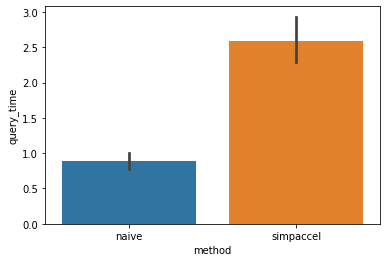

In [39]:
sn.barplot(data=query_time_df, x='method', y='query_time')

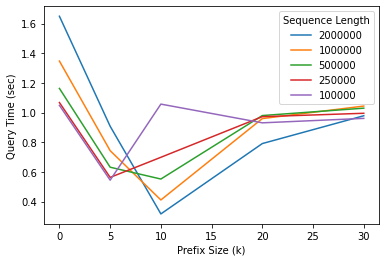

In [40]:
for seq_len in reversed(sorted(list(set(query_time_df['seq_len'])))):
    curr_df = query_time_df[(query_time_df['seq_len'] == seq_len) & (query_time_df['method'] == 'naive')]
    plt.plot(curr_df['k'], curr_df['query_time'], label=seq_len)
plt.xlabel('Prefix Size (k)')
plt.ylabel('Query Time (sec)')
plt.legend(title='Sequence Length')

In [47]:
query_len_df = pd.read_csv('query_length.csv')
query_len_df = query_len_df.sort_values(by='query_size')
query_len_df.head()

,seq_len,k,method,query_size,query_time
36,100000,10,naive,20,0.000088
156,1000000,10,naive,20,0.000039
116,500000,10,naive,20,0.000060
196,2000000,10,naive,20,0.000027
76,250000,10,naive,20,0.000075


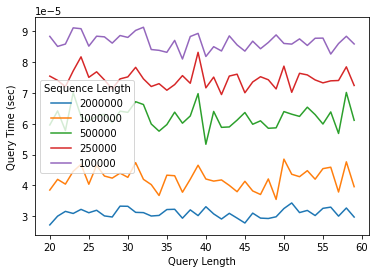

In [48]:
for seq_len in reversed(sorted(list(set(query_len_df['seq_len'])))):
    curr_df = query_len_df[(query_len_df['seq_len'] == seq_len)]
    plt.plot(curr_df['query_size'], curr_df['query_time'], label=seq_len)
plt.xlabel('Query Length')
plt.ylabel('Query Time (sec)')
plt.legend(title='Sequence Length')